# 📱 MOBILE DEVICE PRICE PREDICTION

Data: https://www.kaggle.com/code/sadafpj/mobile-price-predition

## Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

## Columns

* **id:** D
* **battery_power:** Total energy a battery can store in one time measured in mAh
* **blue:** Has bluetooth or not
* **clock_speed:** Speed at which microprocessor executes instructions
* **dual_sim:** Has dual sim support or not
* **fc:** Front Camera mega pixels
* **four_g:** Has 4G or not
* **int_memory:** Internal Memory in Gigabytes
* **m_dep:** Mobile Depth in cm
* **mobile_wt:** Weight of mobile phone
* **n_cores:** Number of cores of processor
* **pc:** Primary Camera mega pixels
* **px_height:** Pixel Resolution Height
* **px_width:** Pixel Resolution Width
* **ram:** Random Access Memory in Megabytes
* **sc_h:** Screen Height of mobile in cm
* **sc_w:** Screen Width of mobile in cm
* **talk_time:** longest time that a single battery charge will last when you are
* **three_g:** Has 3G or not
* **touch_screen:** Has touch screen or not
* **wifi:** Has wifi or not
* **price_range:** 0 - 4

## Data explortation

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# Load the training data into a dataframe
df_train = pd.read_csv('data/train.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
# Display the information and shape for the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [19]:
# Display the shape of the dataframe
print(f'Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}')

Rows: 2000, Columns: 21


In [13]:
# Check for null values
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### BAR GRAPH: Number of devices in each price range

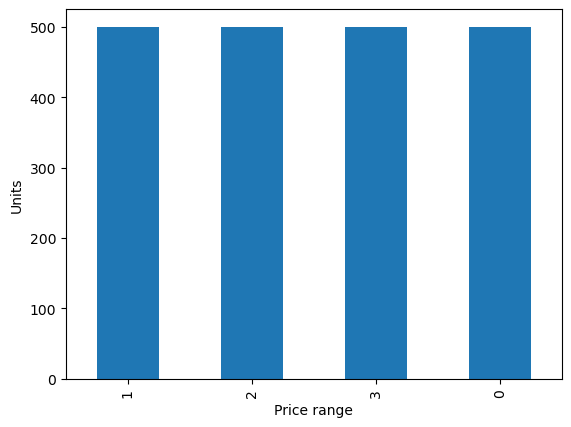

In [33]:
df_train['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Price range')
plt.ylabel('Units');

### POINT PLOT: Internal memory vs. price range

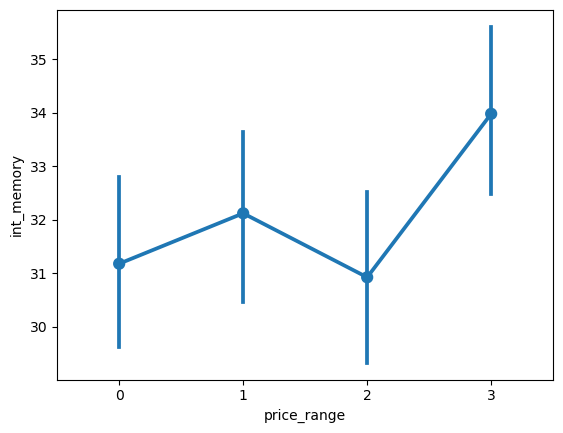

In [37]:
sns.pointplot(y="int_memory", x="price_range", data=df_train);

### SCATTER: Clock speed vs. RAM (0 & 3 price range)

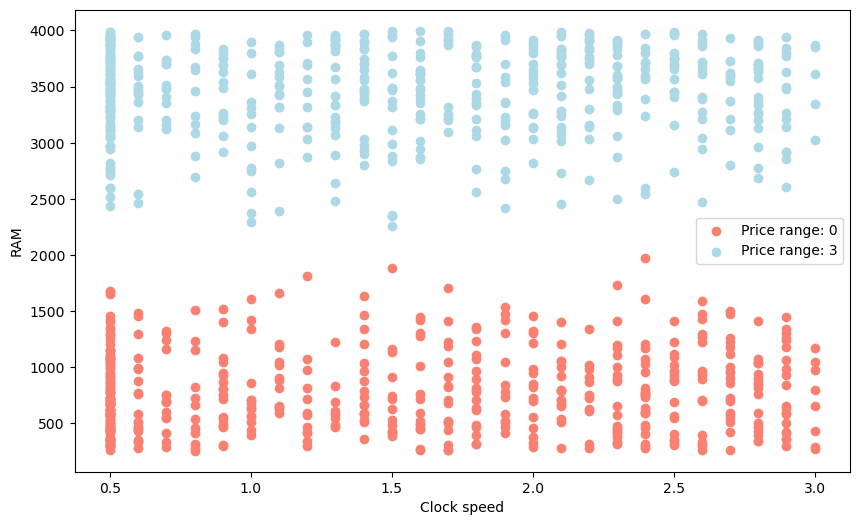

In [46]:
plt.figure(figsize=(10, 6))

plt.scatter(df_train.clock_speed[df_train.price_range==0], df_train.ram[df_train.price_range==0], color='salmon')
plt.scatter(df_train.clock_speed[df_train.price_range==3], df_train.ram[df_train.price_range==3], color='lightblue')

plt.xlabel('Clock speed')
plt.ylabel('RAM')
plt.legend(['Price range: 0', 'Price range: 3']);

### PIE CHART: 3G support & 4G support

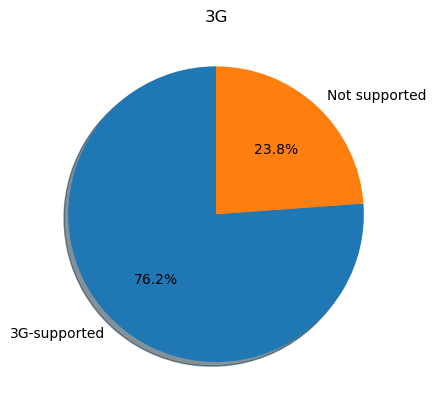

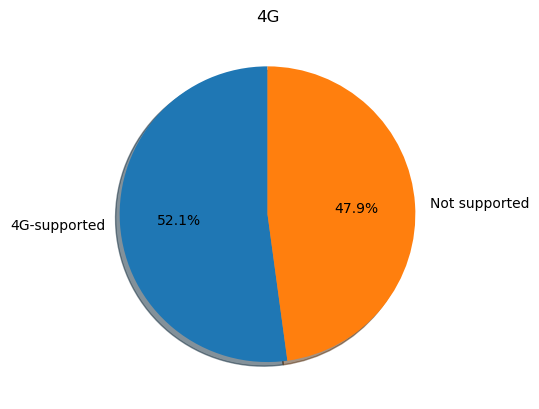

In [59]:
labels_3g = ["3G-supported",'Not supported']
values_3g=df_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_3g, labels=labels_3g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('3G')
plt.show()

labels_4g = ["4G-supported",'Not supported']
values_4g = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('4G')
plt.show()

### BOX PLOT: Battery power vs Price Range

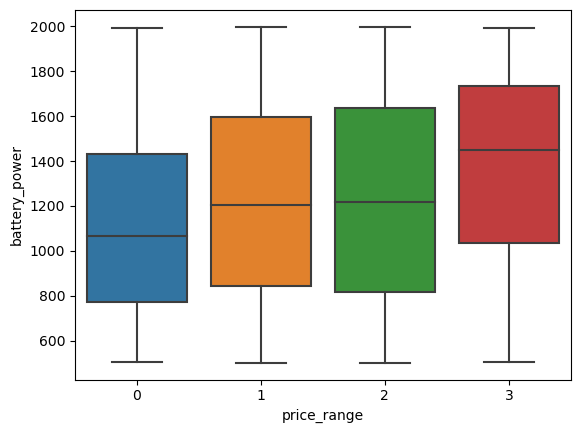

In [63]:
sns.boxplot(x="price_range", y="battery_power", data=df_train);

### POINT PLOT: Talk time vs. Price range

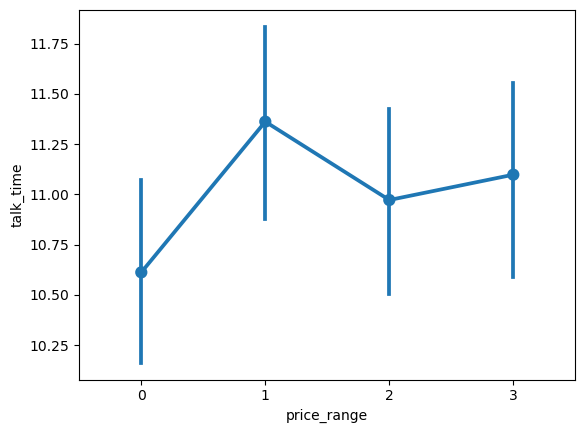

In [66]:
sns.pointplot(y="talk_time", x="price_range", data=df_train);

## Modelling

What we are going to do:
1. Split the data into features and target
2. Split the feature and target data into training and test sets
3. Train and test a few models and see which performs the best
4. Use the best model on the test data

In [70]:
# Split the data into features (x) and target (y)
x = df_train.drop('price_range', axis=1)
y = df_train['price_range']

In [71]:
# Split the feature and target data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Linear Regression Model

In [77]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
LinR.fit(x_train, y_train)
print(f'Accuracy: {LinR.score(x_test, y_test)*100:.2f}%')

Accuracy: 91.60%


### KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
print(f'Accuracy: {knn.score(x_test, y_test)*100:.2f}%')

Accuracy: 93.75%


### Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print(f'Accuracy: {dtree.score(x_test, y_test)*100:.2f}%')

Accuracy: 84.50%


### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
print(f'Accuracy: {rfc.score(x_test, y_test)*100:.2f}%')

Accuracy: 88.25%


# RESULT: KNN Performed the best :)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix
prediction = knn.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.94      0.95      0.95       103
           2       0.90      0.90      0.90       105
           3       0.95      0.91      0.93        97

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



<Axes: >

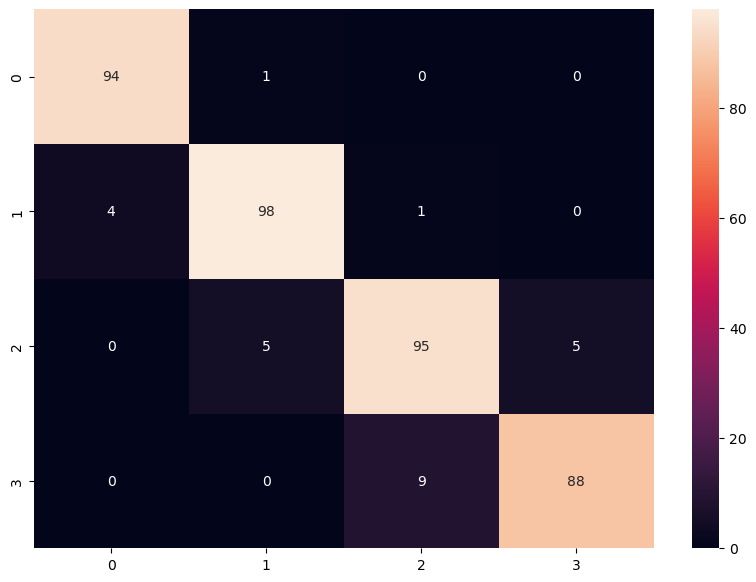

In [95]:
matrix=confusion_matrix(y_test, prediction)
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True)

# APPLY TO TEST DATA

We will now use our model to accurately predict the price range of the mobile devices on the test data set.

In [99]:
df_test = pd.read_csv('data/test.csv')
df_test = df_test.drop('id', axis=1)
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [101]:
df_test_prices = knn.predict(df_test)
df_test_prices

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 2, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       1, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [103]:
# Add the predicted prices to the table.
df_test['price_range'] = df_test_prices
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
